In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime

# Loading the data using panadas 
smart = pd.read_csv('data_smart.csv')
smart.tail()

C:\Users\larinaitwe\AppData\Local\Temp\ipykernel_12780\3733047146.py:9: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  smart = pd.read_csv('data_smart.csv')


,Unique_Id,Status,Pin,ProductCode,Period,Network,ThirdPartyId,Amount,CreatedBy,RecordDate,...,AGE,FIRST_CONTRIBUTION,LAST_CONTRIBUTION,CONTRIBUTIONS,CONTRIBUTION_YEARS,TOTAL_AMOUNT,PERCENTAGE_CONSISTENCY,LATEST_CONTRIBUTION,GENDER,AVERAGE_ANNUAL_GROWTH
54969,57132,SUCCESS,NaN,101,1,MTN,NaN,5000,NaN,26:30.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54970,57134,FAILED,NaN,101,2,MTN,NaN,20000,NaN,35:16.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54971,57137,FAILED,NaN,101,2,MTN,NaN,20000,NaN,38:49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54972,57143,SUCCESS,NaN,101,1,MTN,NaN,5000,NaN,52:22.1,...,48.2416,7/31/2016,7/31/2024,83.0,8.8,20167100.0,85.57,195000.0,F,42.646724
54973,57145,FAILED,NaN,101,1,MTN,NaN,5000,NaN,58:36.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# General info
smart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54974 entries, 0 to 54973
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unique_Id               54974 non-null  int64  
 1   Status                  54974 non-null  object 
 2   Pin                     11664 non-null  object 
 3   ProductCode             54974 non-null  int64  
 4   Period                  54974 non-null  int64  
 5   Network                 54512 non-null  object 
 6   ThirdPartyId            1 non-null      float64
 7   Amount                  54974 non-null  int64  
 8   CreatedBy               0 non-null      float64
 9   RecordDate              54974 non-null  object 
 10  LastUpdatedBy           0 non-null      float64
 11  LastUpdatedDate         54974 non-null  object 
 12  ApprovedBy              0 non-null      float64
 13  ApprovedDate            0 non-null      float64
 14  Processed               54974 non-null

In [20]:
# Check missing values
smart.isnull().sum().sort_values(ascending=False).head(15)

CreatedBy                 54974
LastUpdatedBy             54974
RelationMg                54974
ApprovedDate              54974
ApprovedBy                54974
ThirdPartyId              54973
Occupation                54125
Pin                       43310
IdType                    41974
TOTAL_AMOUNT              23577
PERCENTAGE_CONSISTENCY    23566
LAST_CONTRIBUTION         23566
CONTRIBUTIONS             23566
CONTRIBUTION_YEARS        23566
AGE                       23566
dtype: int64

In [21]:
# Check for duplicate records
smart.duplicated().sum()

np.int64(0)

In [22]:
# Descriptive statistics for numerical variables
smart.describe().T

,count,mean,std,min,25%,50%,75%,max
Unique_Id,54974.0,2.978239e+04,1.605944e+04,1.047000e+03,1.574925e+04,2.993150e+04,4.368675e+04,5.745700e+04
ProductCode,54974.0,1.010000e+02,0.000000e+00,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02
Period,54974.0,6.310077e+03,5.275395e+05,0.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.000000e+08
ThirdPartyId,1.0,3.228058e+10,NaN,3.228058e+10,3.228058e+10,3.228058e+10,3.228058e+10,3.228058e+10
Amount,54974.0,5.348211e+04,8.558443e+05,5.000000e+03,5.000000e+03,5.000000e+03,1.000000e+04,1.000000e+08
CreatedBy,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LastUpdatedBy,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApprovedBy,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApprovedDate,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Processed,54974.0,5.055845e-01,4.999734e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


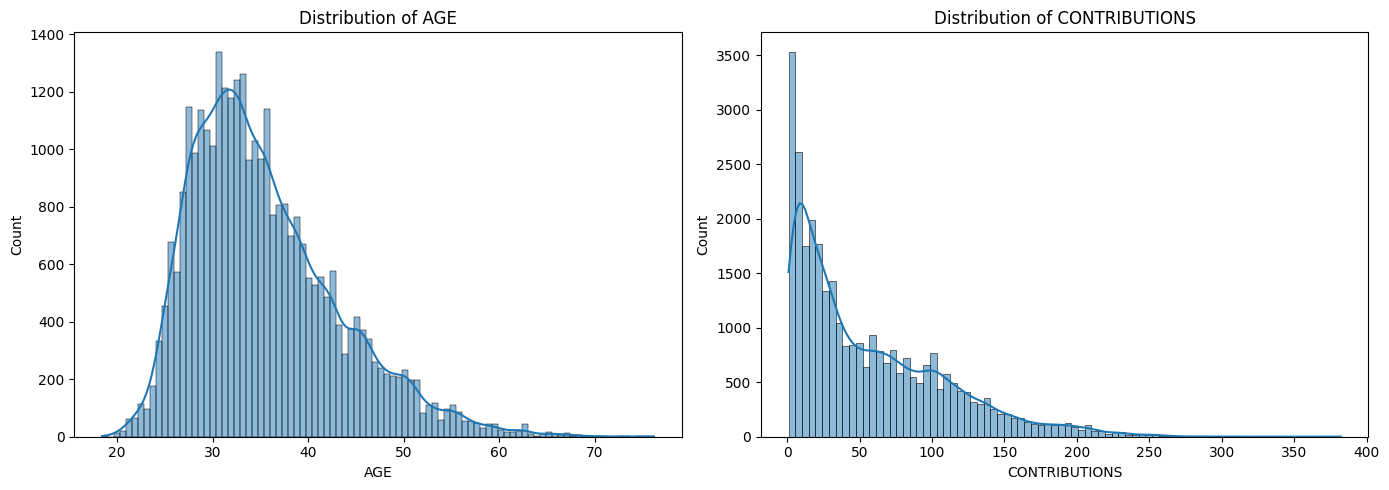

In [23]:
# Histograms for key numerical features
features = ['AGE', 'CONTRIBUTIONS']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
for ax, feature in zip(axes.flatten(), features):
    sns.histplot(smart[feature].dropna(), kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')
plt.tight_layout()

In [24]:
smart.isna().sum()

Unique_Id                     0
Status                        0
Pin                       43310
ProductCode                   0
Period                        0
Network                     462
ThirdPartyId              54973
Amount                        0
CreatedBy                 54974
RecordDate                    0
LastUpdatedBy             54974
LastUpdatedDate               0
ApprovedBy                54974
ApprovedDate              54974
Processed                     0
Reason                     1506
PaymentId                 18381
Approved                      0
IdType                    41974
AdditionalInformation         0
PaymentFlag                 805
RelationMg                54974
AccountPurpose                0
TargetAmount                  0
Channel                       0
Frequency                 15039
PaymentAccount              150
SourceOfIncome              322
Industry                   7710
CountryOfResidence        15182
Occupation                54125
Contribu

Text(0.5, 1.0, 'User Behavior Clusters')

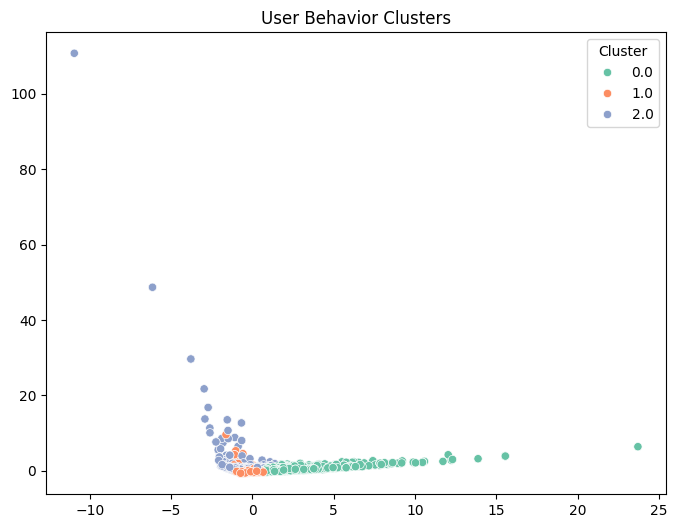

In [25]:
# Select features for clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

cluster_features = smart[['TOTAL_AMOUNT', 'CONTRIBUTIONS', 'AVERAGE_ANNUAL_GROWTH', 'PERCENTAGE_CONSISTENCY']].dropna()
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features) #

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Assign cluster labels back to the original DataFrame, aligning by index
smart.loc[cluster_features.index, 'Cluster'] = cluster_labels

# Reduce to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=smart.loc[cluster_features.index, 'Cluster'], palette='Set2')
plt.title('User Behavior Clusters')

# Task
Analyze the provided dataset to uncover patterns, trends, and insights related to user behavior and engagement. The analysis should include understanding the data structure, summarizing key statistics, exploring user behavior patterns, identifying potential outliers or segments of interest, and addressing specific analytical questions about user engagement, retention, and demographic/regional patterns. The analysis should incorporate appropriate visualizations such as histograms, boxplots, bar charts, time series plots, correlation matrices, and potentially heatmaps or clustering.

## Review and refine previous steps

### Subtask:
Revisit the initial steps to ensure the data loading is optimal (e.g., handling mixed data types), and consider additional ways to visualize distributions and missing values.


**Reasoning**:
Reload the dataset with the specified dtype for the 'Occupation' column to address the DtypeWarning and then generate missing value visualizations.



Dataset reloaded with 'Occupation' column as string type.


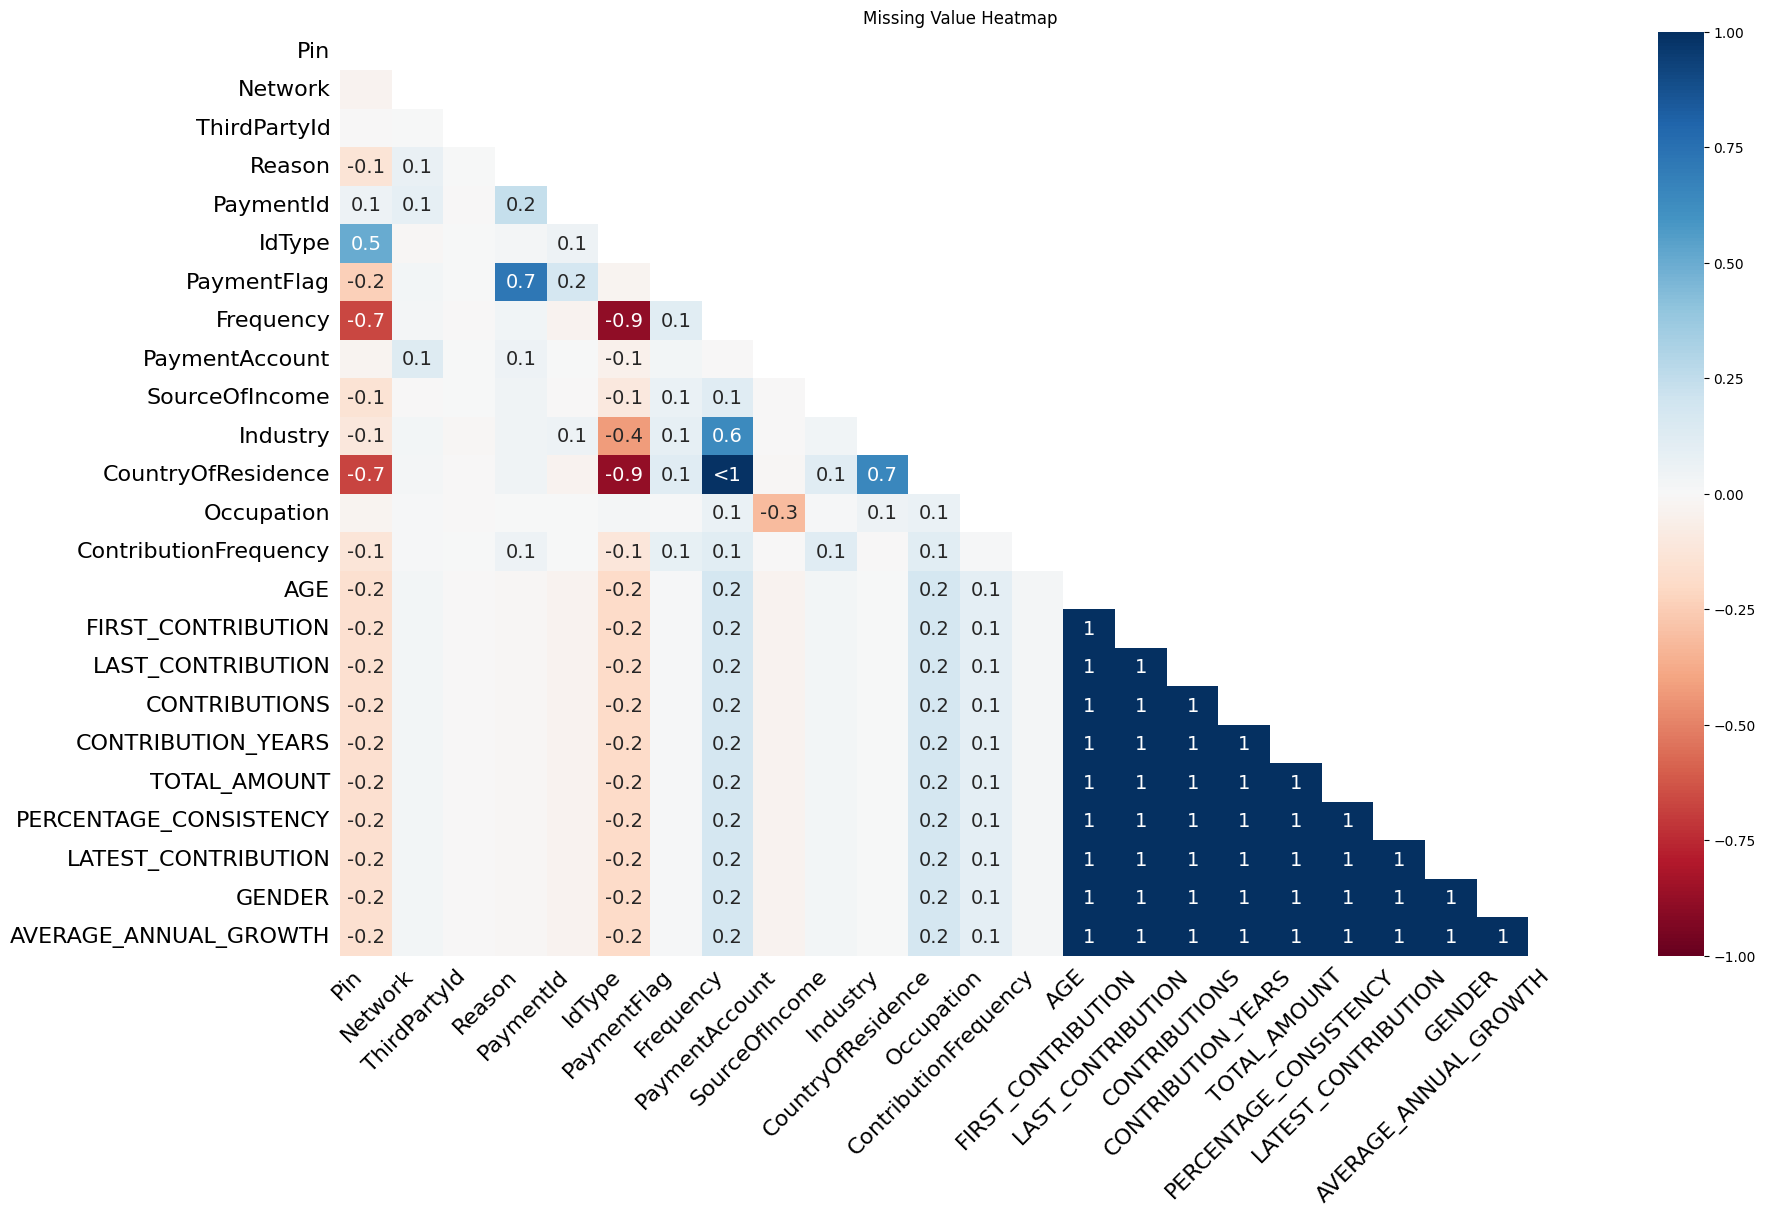

In [26]:
# Reload the data with specified dtype for column 30 (Occupation)
smart = pd.read_csv('data_smart.csv', dtype={'Occupation': str})
print("Dataset reloaded with 'Occupation' column as string type.")

# Generate missing value heatmap
msno.heatmap(smart)
plt.title('Missing Value Heatmap')
plt.show()

## Categorical feature analysis

### Subtask:
Analyze and visualize the distribution of categorical variables using bar plots.


**Reasoning**:
Identify categorical columns and then iterate through them to create and display bar plots for the distribution of unique values. Adjust figure size and rotate labels for better readability.



C:\Users\larinaitwe\AppData\Local\Temp\ipykernel_12780\2571814063.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=smart, y=col, order=smart[col].value_counts().index, palette='viridis')


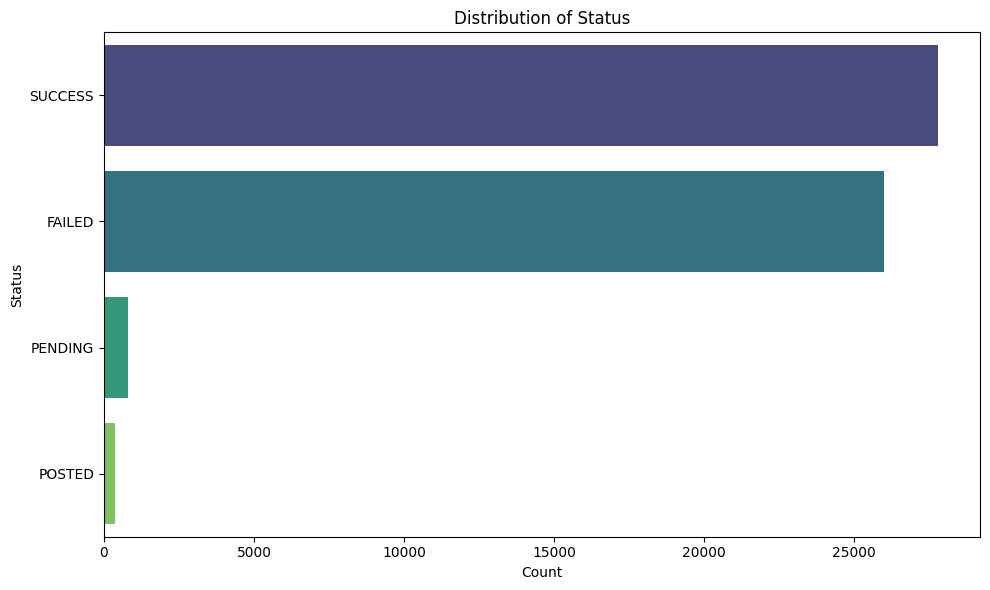

C:\Users\larinaitwe\AppData\Local\Temp\ipykernel_12780\2571814063.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=smart, y=col, order=smart[col].value_counts().index, palette='viridis')


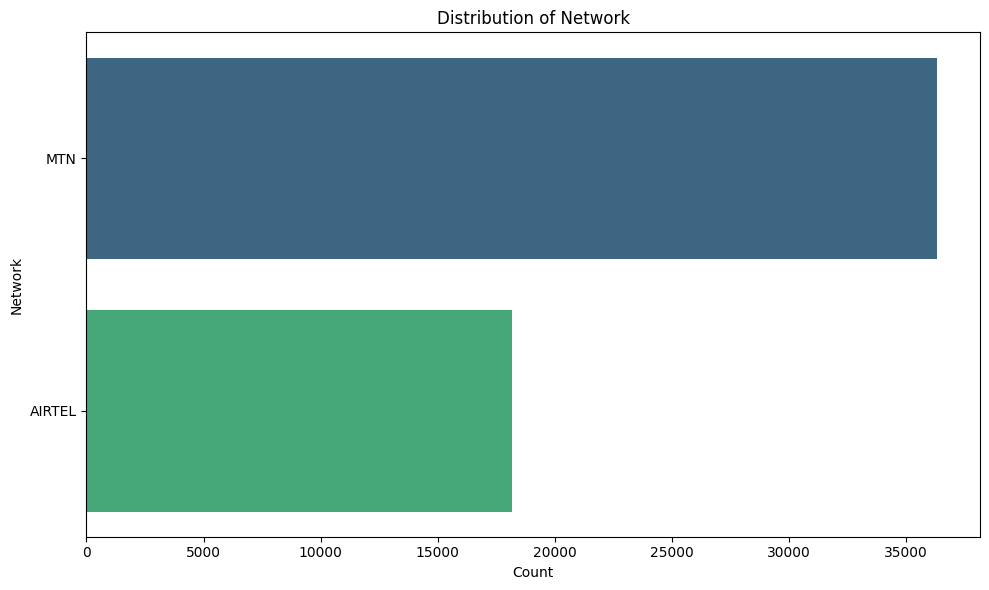

C:\Users\larinaitwe\AppData\Local\Temp\ipykernel_12780\2571814063.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=smart, y=col, order=smart[col].value_counts().index, palette='viridis')
C:\Users\larinaitwe\AppData\Local\Temp\ipykernel_12780\2571814063.py:16: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


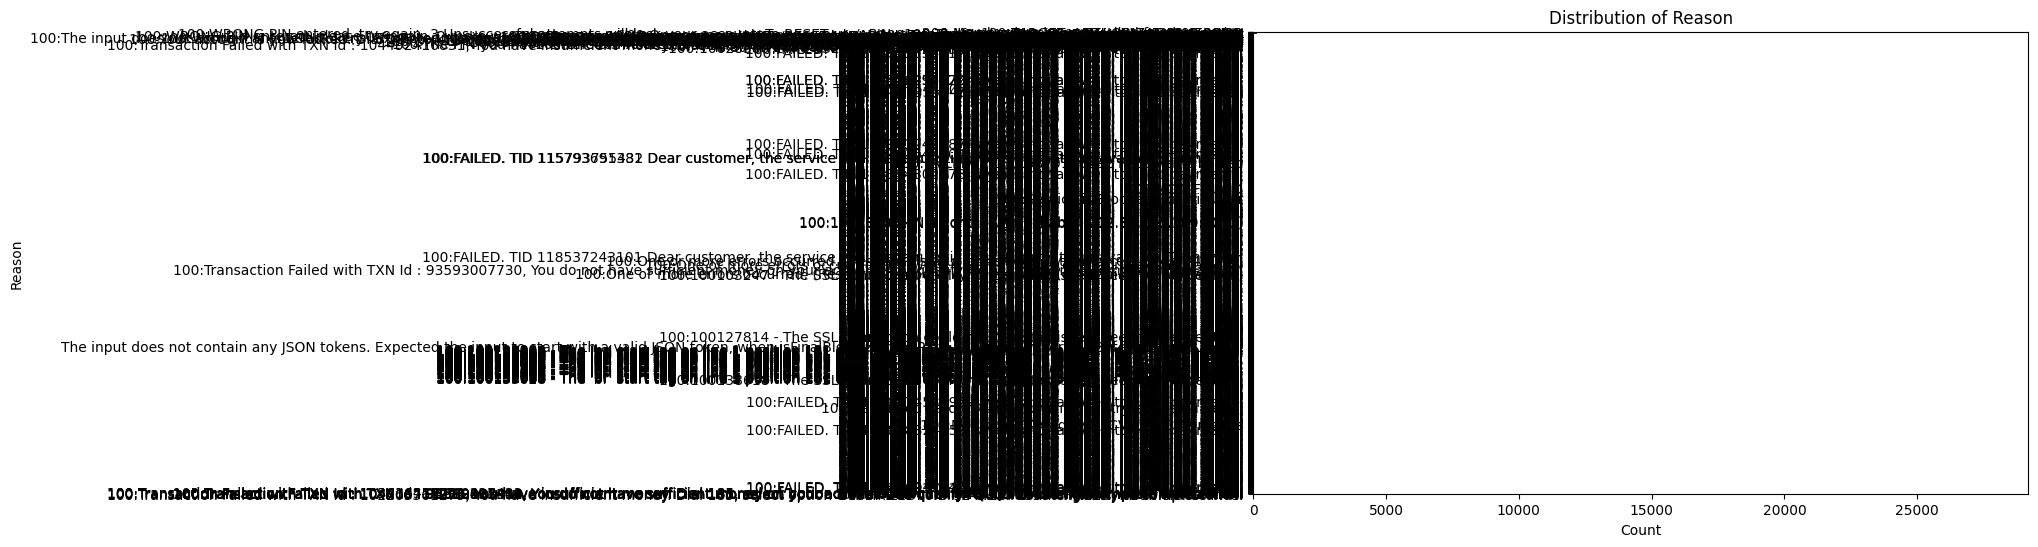

C:\Users\larinaitwe\AppData\Local\Temp\ipykernel_12780\2571814063.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=smart, y=col, order=smart[col].value_counts().index, palette='viridis')


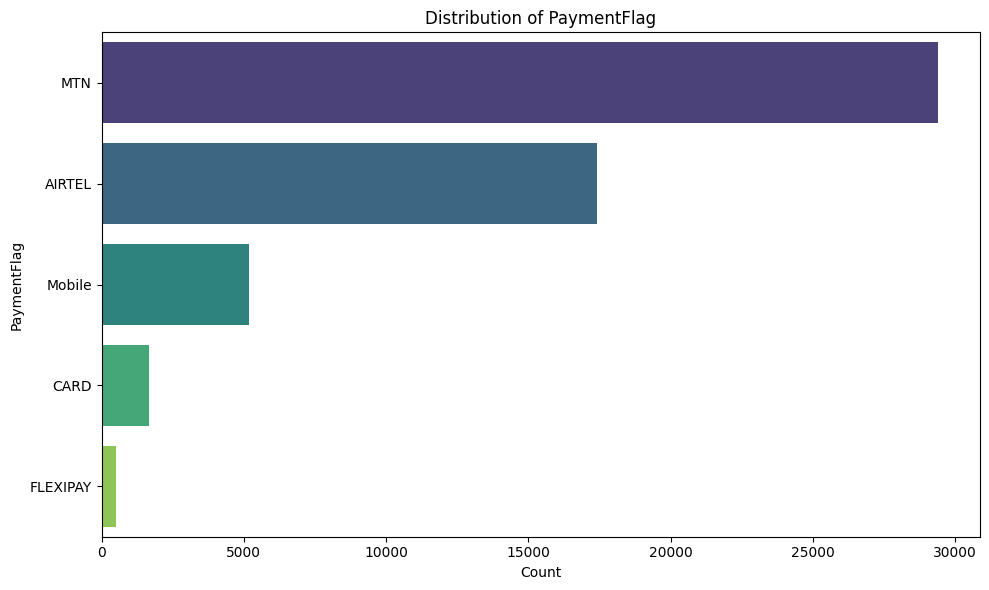

C:\Users\larinaitwe\AppData\Local\Temp\ipykernel_12780\2571814063.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=smart, y=col, order=smart[col].value_counts().index, palette='viridis')


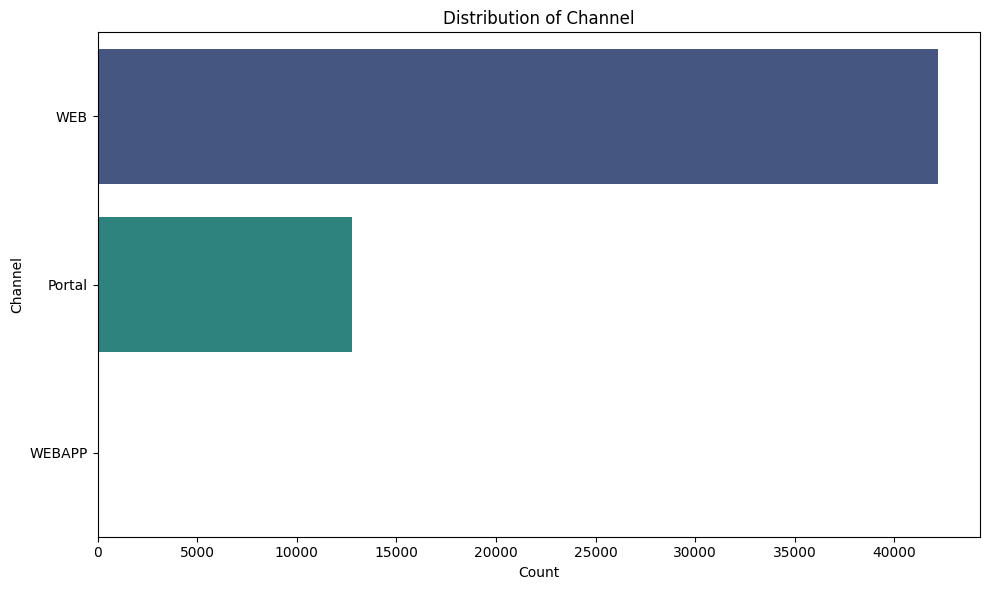

C:\Users\larinaitwe\AppData\Local\Temp\ipykernel_12780\2571814063.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=smart, y=col, order=smart[col].value_counts().index, palette='viridis')


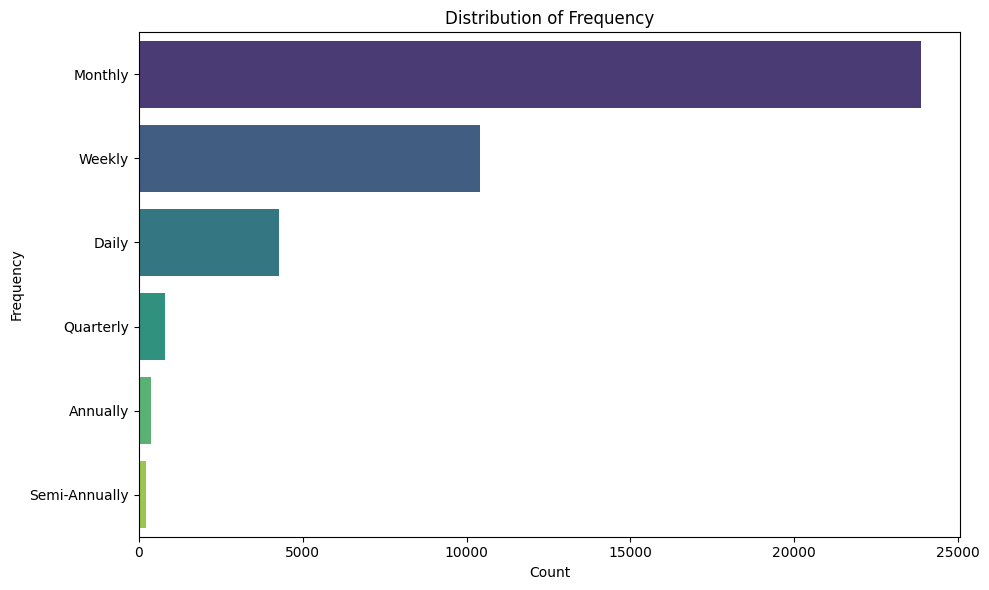

C:\Users\larinaitwe\AppData\Local\Temp\ipykernel_12780\2571814063.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=smart, y=col, order=smart[col].value_counts().index, palette='viridis')


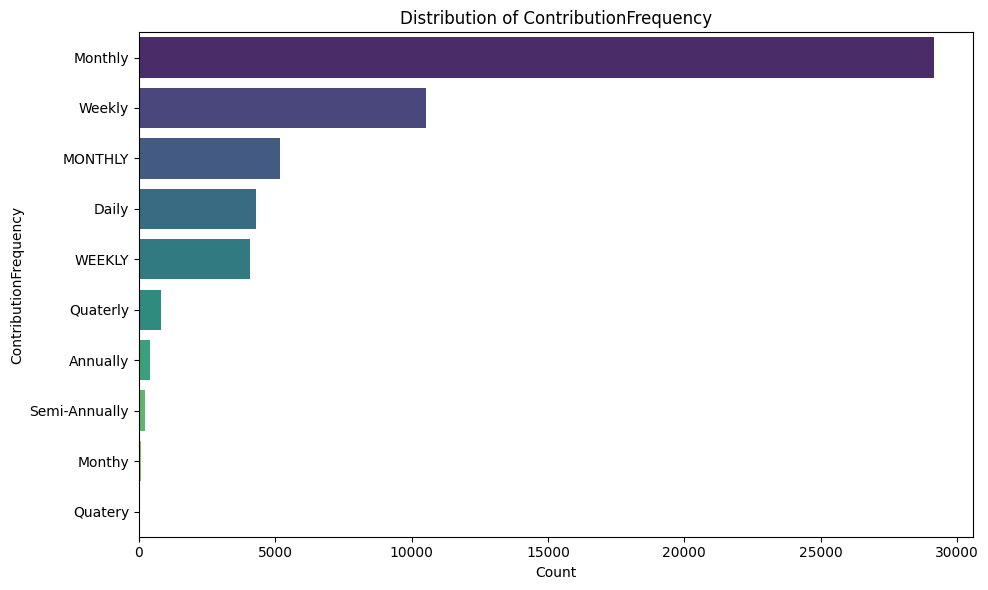

C:\Users\larinaitwe\AppData\Local\Temp\ipykernel_12780\2571814063.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=smart, y=col, order=smart[col].value_counts().index, palette='viridis')


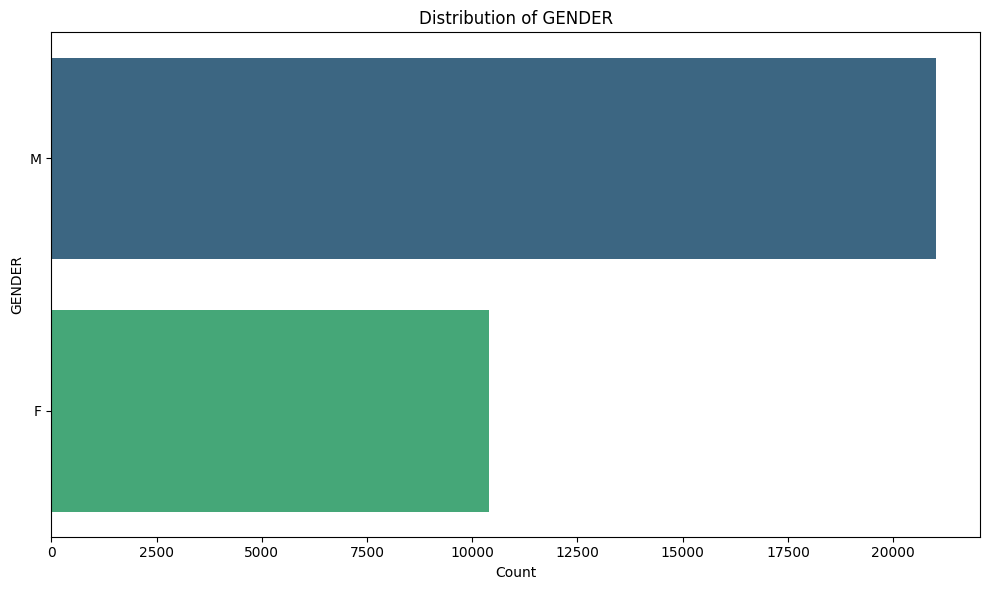

In [27]:
# Identify categorical columns
categorical_cols = smart.select_dtypes(include='object').columns

# Exclude columns that are likely identifiers or have too many unique values to plot meaningfully
# Based on previous info() and head(), 'RecordDate', 'LastUpdatedDate', 'FIRST_CONTRIBUTION', 'LAST_CONTRIBUTION', 'PaymentId', 'Pin', 'IdType', 'AdditionalInformation', 'AccountPurpose', 'PaymentAccount', 'SourceOfIncome', 'Industry', 'CountryOfResidence', 'Occupation' might have too many unique values or are date/time/identifier related.
# Let's focus on 'Status', 'Network', 'Reason', 'PaymentFlag', 'Channel', 'Frequency', 'ContributionFrequency', 'GENDER'.
categorical_cols_to_plot = ['Status', 'Network', 'Reason', 'PaymentFlag', 'Channel', 'Frequency', 'ContributionFrequency', 'GENDER']

# Create bar plots for each selected categorical column
for col in categorical_cols_to_plot:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=smart, y=col, order=smart[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

## Time series analysis

### Subtask:
If possible, convert date columns to datetime objects and analyze trends over time.


**Reasoning**:
Convert identified date columns to datetime objects and then analyze and visualize trends of 'Amount' over time.



**Reasoning**:
Analyze and visualize trends of 'TOTAL_AMOUNT' over time using 'FIRST_CONTRIBUTION' and 'LAST_CONTRIBUTION' after converting them to datetime objects.



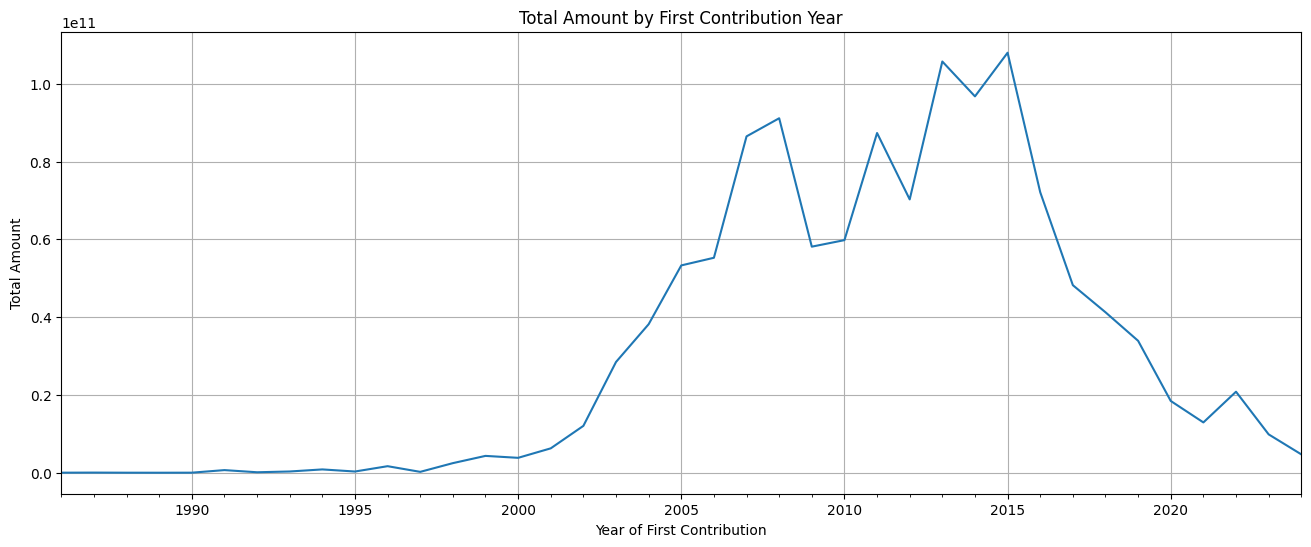

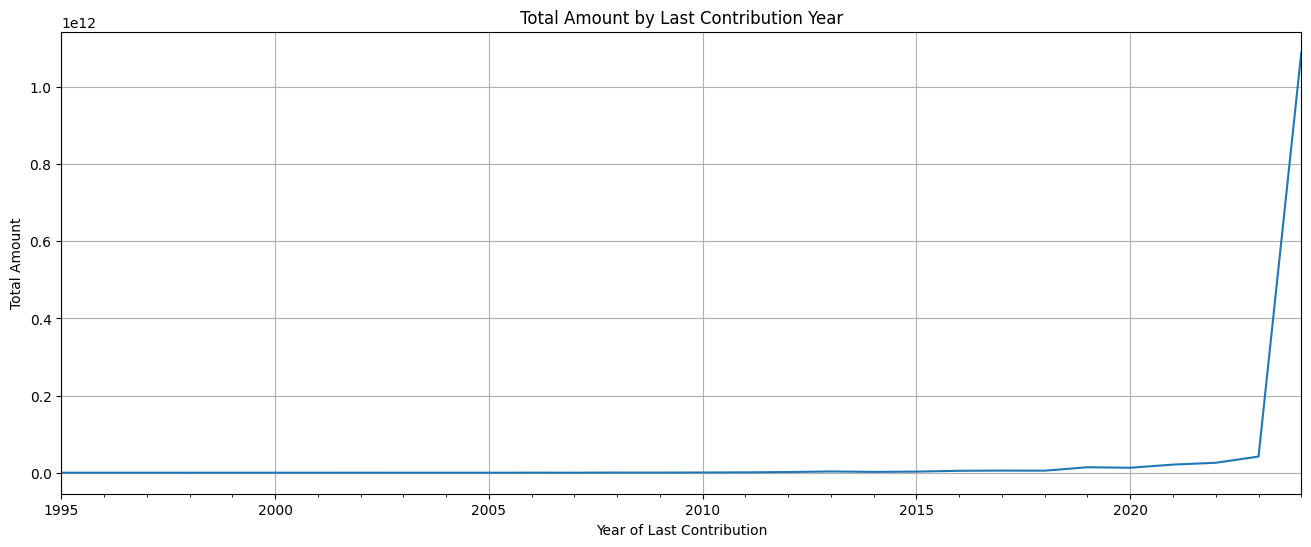

In [28]:
# Analyze trends over time for 'TOTAL_AMOUNT' based on 'FIRST_CONTRIBUTION'
# Group by year and sum the total amount
smart['FIRST_CONTRIBUTION'] = pd.to_datetime(smart['FIRST_CONTRIBUTION'], errors='coerce')
smart['FirstContributionYear'] = smart['FIRST_CONTRIBUTION'].dt.to_period('Y')
total_amount_first_contribution = smart.groupby('FirstContributionYear')['TOTAL_AMOUNT'].sum()

# Convert the PeriodIndex to DateTimeIndex for plotting
total_amount_first_contribution.index = total_amount_first_contribution.index.to_timestamp()

# Visualize the trend
plt.figure(figsize=(16, 6))
total_amount_first_contribution.plot()
plt.title('Total Amount by First Contribution Year')
plt.xlabel('Year of First Contribution')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

# Analyze trends over time for 'TOTAL_AMOUNT' based on 'LAST_CONTRIBUTION'
# Group by year and sum the total amount
smart['LAST_CONTRIBUTION'] = pd.to_datetime(smart['LAST_CONTRIBUTION'], errors='coerce')
smart['LastContributionYear'] = smart['LAST_CONTRIBUTION'].dt.to_period('Y')
total_amount_last_contribution = smart.groupby('LastContributionYear')['TOTAL_AMOUNT'].sum()

# Convert the PeriodIndex to DateTimeIndex for plotting
total_amount_last_contribution.index = total_amount_last_contribution.index.to_timestamp()

# Visualize the trend
plt.figure(figsize=(16, 6))
total_amount_last_contribution.plot()
plt.title('Total Amount by Last Contribution Year')
plt.xlabel('Year of Last Contribution')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

## Correlation analysis

### Subtask:
Compute and visualize the correlation matrix for numerical features.


**Reasoning**:
Select numerical columns, compute the correlation matrix, and visualize it using a heatmap with annotations.



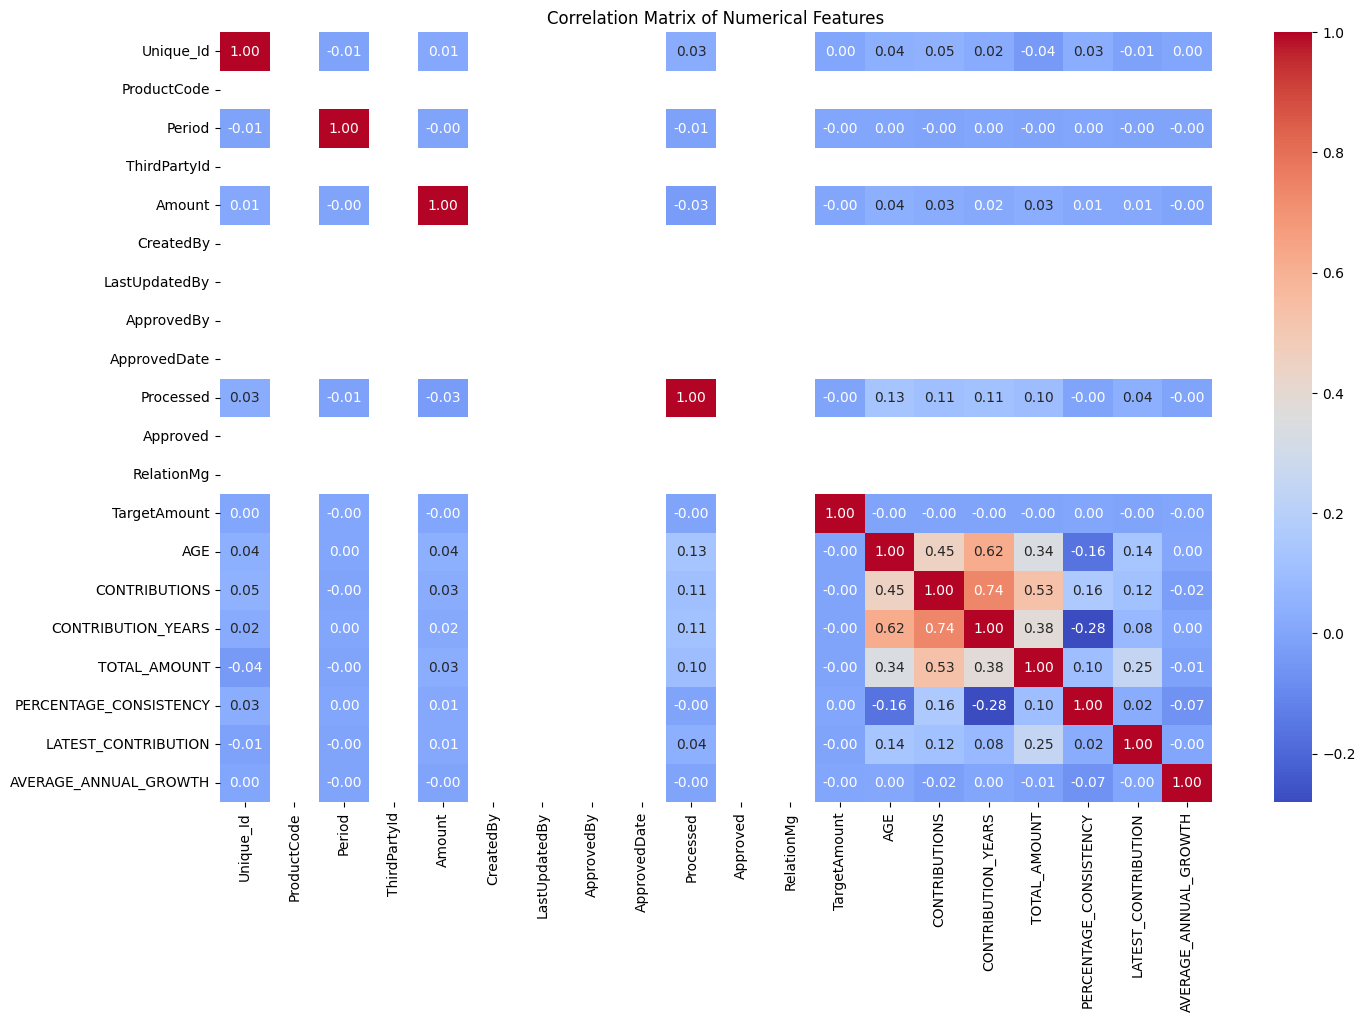

In [29]:
# Select numerical columns
numerical_cols = smart.select_dtypes(include=np.number).columns

# Compute the correlation matrix
correlation_matrix = smart[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

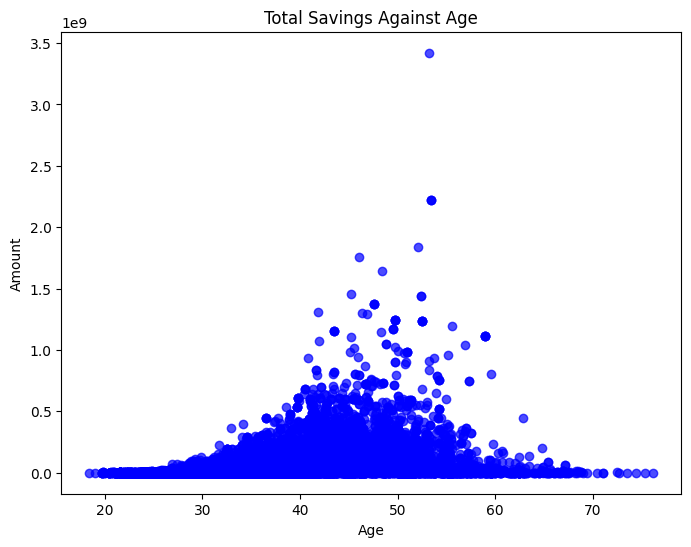

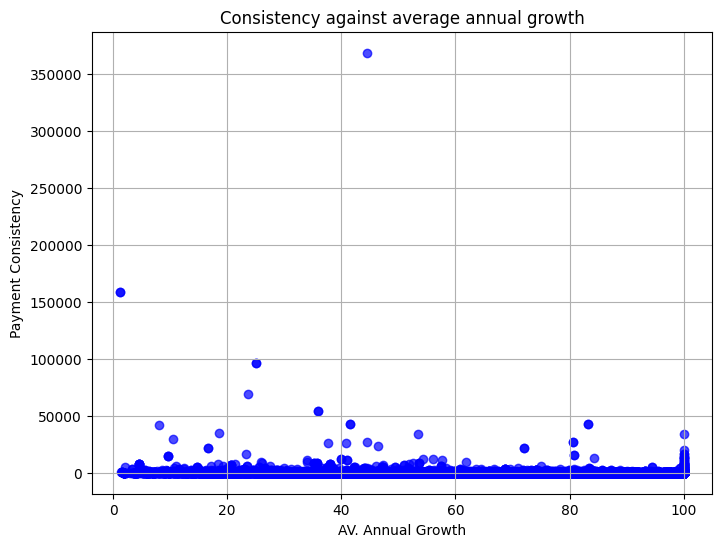

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(smart['AGE'], smart['TOTAL_AMOUNT'], color='blue', alpha=0.7)
plt.title('Total Savings Against Age')
plt.xlabel('Age')
plt.ylabel('Amount')

plt.figure(figsize=(8, 6))
plt.scatter(smart['PERCENTAGE_CONSISTENCY'], smart['AVERAGE_ANNUAL_GROWTH'], color='blue', alpha=0.7)
plt.title('Consistency against average annual growth')
plt.xlabel('AV. Annual Growth')
plt.ylabel('Payment Consistency')

plt.grid()
plt.show()

## Cluster analysis and interpretation

### Subtask:
Analyze the characteristics of the identified user clusters in more detail and interpret their meaning.


**Reasoning**:
Group the DataFrame by cluster and calculate the mean and median for the clustering features.



In [31]:
# Assign cluster labels back to the original DataFrame, aligning by index
# The cluster_labels were derived from cluster_features, so we use its index to align
smart = smart.copy() # Create a copy to avoid SettingWithCopyWarning
smart['Cluster'] = -1 # Initialize a default value for rows not included in clustering
smart.loc[cluster_features.index, 'Cluster'] = cluster_labels.astype(int)

# Now group the DataFrame by 'Cluster' and calculate the mean and median for the clustering features
cluster_analysis = smart.groupby('Cluster')[['TOTAL_AMOUNT', 'CONTRIBUTIONS', 'AVERAGE_ANNUAL_GROWTH', 'PERCENTAGE_CONSISTENCY']].agg(['mean', 'median'])
print("Cluster Analysis (Mean and Median):")
display(cluster_analysis)

# Summarize the characteristics of each cluster based on the analysis
print("\nCluster Interpretation:")
for cluster_id in cluster_analysis.index:
    if cluster_id == -1:
        print(f"Cluster {cluster_id} (Non-clustered): Represents users with missing values in clustering features.")
    else:
        print(f"Cluster {cluster_id}:")
        print(cluster_analysis.loc[cluster_id])

Cluster Analysis (Mean and Median):


TOTAL_AMOUNT             CONTRIBUTIONS        AVERAGE_ANNUAL_GROWTH  \
                 mean      median          mean median                  mean   
Cluster                                                                        
-1                NaN         NaN     96.181818  103.0             79.650608   
 0       1.496132e+08  92677970.5    139.715942  131.0             95.636205   
 1       1.075564e+07   4328297.0     35.601272   26.0            106.382166   
 2       1.374795e+07   5138762.0     36.428942   29.0            522.442780   

                   PERCENTAGE_CONSISTENCY          
            median                   mean  median  
Cluster                                            
-1       79.053161              69.893636   83.06  
 0       46.660223              89.934657   95.00  
 1       37.812914              94.072757  100.00  
 2       88.134135              42.336238   44.19


Cluster Interpretation:
Cluster -1 (Non-clustered): Represents users with missing values in clustering features.
Cluster 0:
TOTAL_AMOUNT            mean      1.496132e+08
                        median    9.267797e+07
CONTRIBUTIONS           mean      1.397159e+02
                        median    1.310000e+02
AVERAGE_ANNUAL_GROWTH   mean      9.563620e+01
                        median    4.666022e+01
PERCENTAGE_CONSISTENCY  mean      8.993466e+01
                        median    9.500000e+01
Name: 0, dtype: float64
Cluster 1:
TOTAL_AMOUNT            mean      1.075564e+07
                        median    4.328297e+06
CONTRIBUTIONS           mean      3.560127e+01
                        median    2.600000e+01
AVERAGE_ANNUAL_GROWTH   mean      1.063822e+02
                        median    3.781291e+01
PERCENTAGE_CONSISTENCY  mean      9.407276e+01
                        median    1.000000e+02
Name: 1, dtype: float64
Cluster 2:
TOTAL_AMOUNT            mean      1.374795e+07
      

**Reasoning**:
The 'Cluster' column was added to the DataFrame `df` based on the index of `cluster_features`, which had rows dropped due to missing values. The KeyError indicates that some rows in the original `df` do not have a 'Cluster' value. I need to handle the missing 'Cluster' values before grouping.



**Reasoning**:
The error persists because the 'Cluster' column was not successfully added to the original DataFrame `df` in the previous code block where clustering was performed. I need to explicitly merge or align the cluster labels with the original DataFrame `df` using the index of the `cluster_features` DataFrame, which was used for clustering.



## Outlier detection

### Subtask:
Identify potential outliers in key numerical features using appropriate visualizations or methods.


**Reasoning**:
Create box plots for the selected numerical features to visualize their distribution and identify potential outliers.



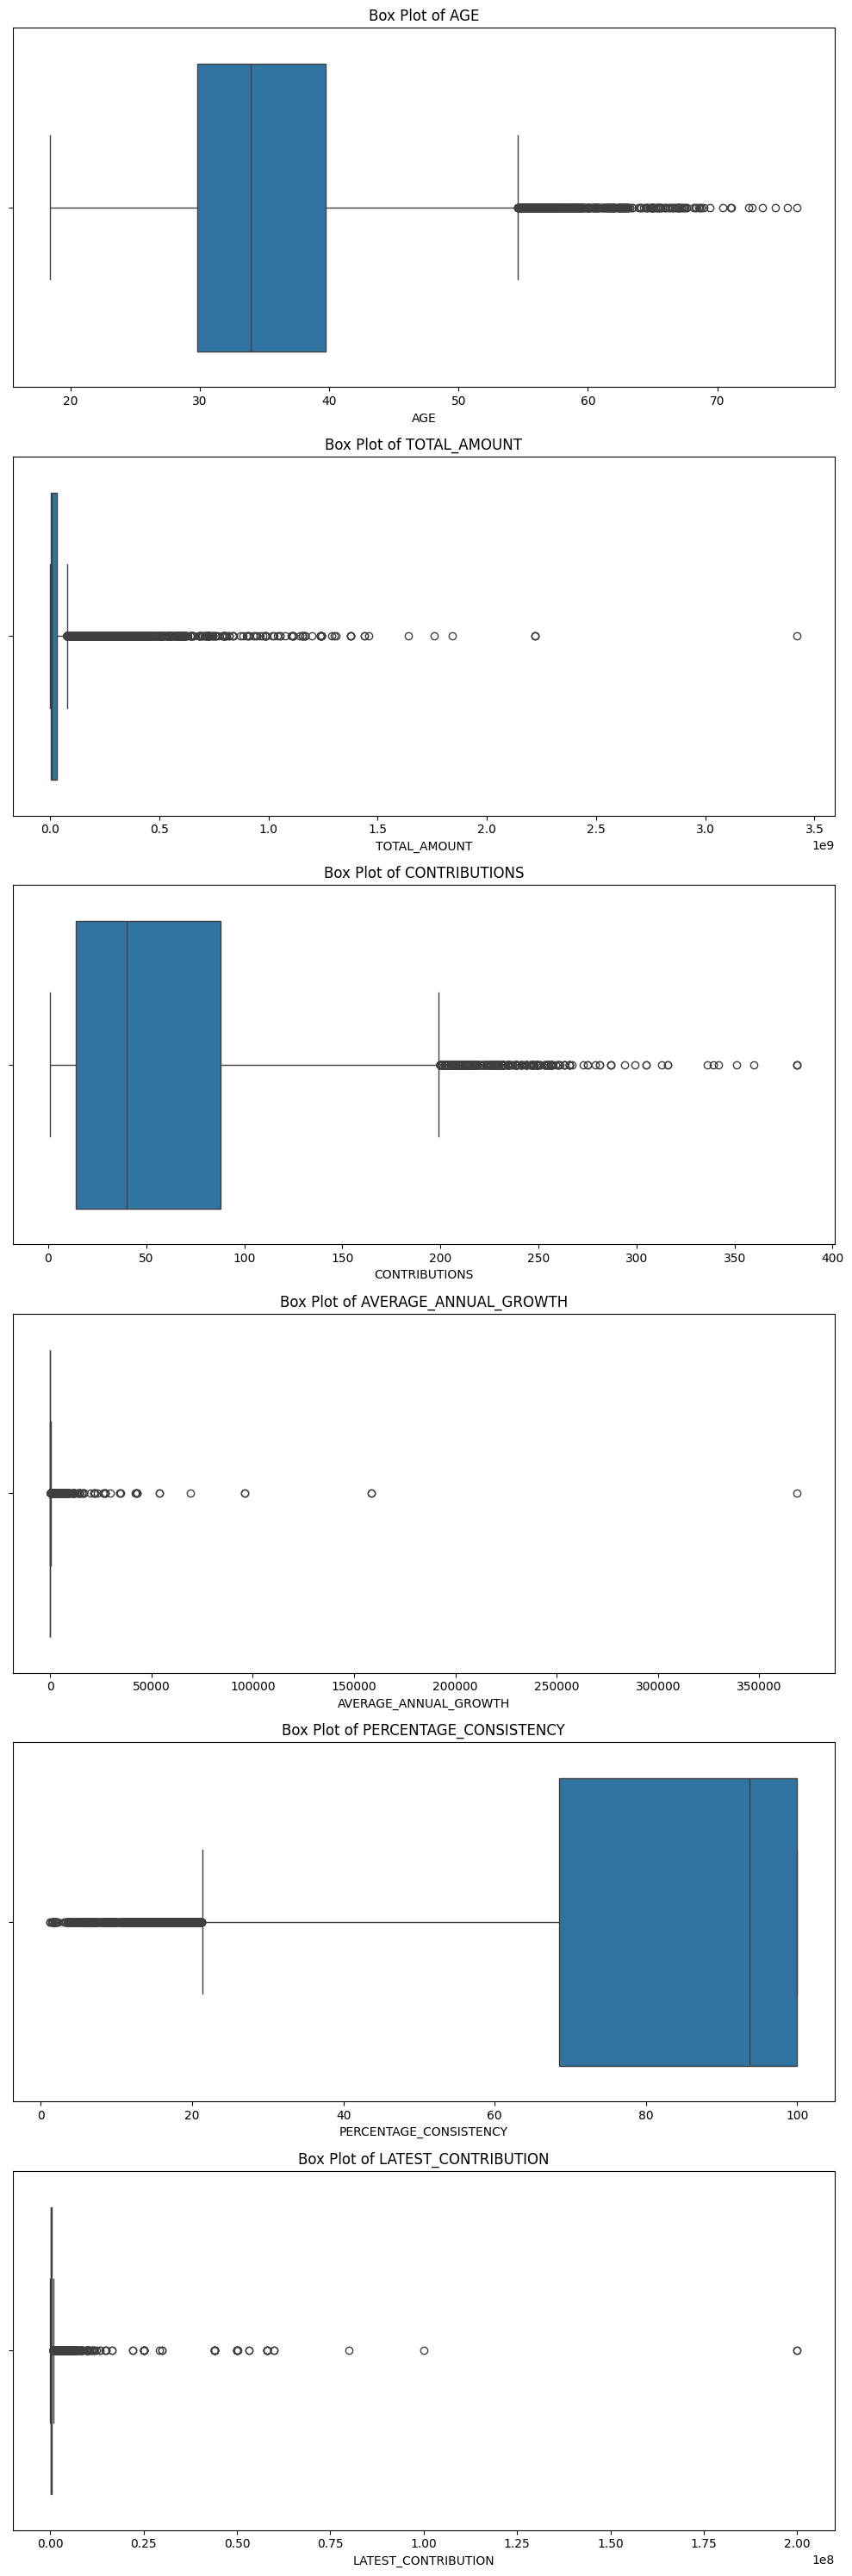

In [33]:
# Select the key numerical features for outlier detection
features_for_outliers = ['AGE', 'TOTAL_AMOUNT', 'CONTRIBUTIONS', 'AVERAGE_ANNUAL_GROWTH', 'PERCENTAGE_CONSISTENCY', 'LATEST_CONTRIBUTION']

# Create box plots for each selected feature
fig, axes = plt.subplots(nrows=len(features_for_outliers), ncols=1, figsize=(10, 5 * len(features_for_outliers)))

for i, feature in enumerate(features_for_outliers):
    sns.boxplot(x=smart[feature].dropna(), ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    axes[i].set_xlabel(feature)

plt.tight_layout()
plt.show()

## Address analytical questions

### Subtask:
Based on the findings from the previous steps, start exploring the analytical questions about user engagement, retention, and demographic/regional patterns.


**Reasoning**:
Analyze user engagement within clusters and investigate relationships with demographic factors and categorical features. Also, analyze transaction status and reason patterns, and examine trends in contribution over time. Finally, consider percentage consistency and discuss correlations.



User Engagement within Clusters (Mean and Median):


CONTRIBUTIONS         TOTAL_AMOUNT            
                 mean median          mean      median
Cluster                                               
-1          96.181818  103.0           NaN         NaN
 0         139.715942  131.0  1.496132e+08  92677970.5
 1          35.601272   26.0  1.075564e+07   4328297.0
 2          36.428942   29.0  1.374795e+07   5138762.0


Engagement Metrics by Gender (Mean and Median):


CONTRIBUTIONS         TOTAL_AMOUNT            AVERAGE_ANNUAL_GROWTH  \
                mean median          mean     median                  mean   
GENDER                                                                       
F          61.885148   45.0  4.396396e+07  9877133.0            176.787386   
M          54.123834   38.0  3.700281e+07  6746429.0            213.356239   

                  PERCENTAGE_CONSISTENCY         
           median                   mean median  
GENDER                                           
F       50.238397              81.152540  93.04  
M       48.685658              81.176357  93.88

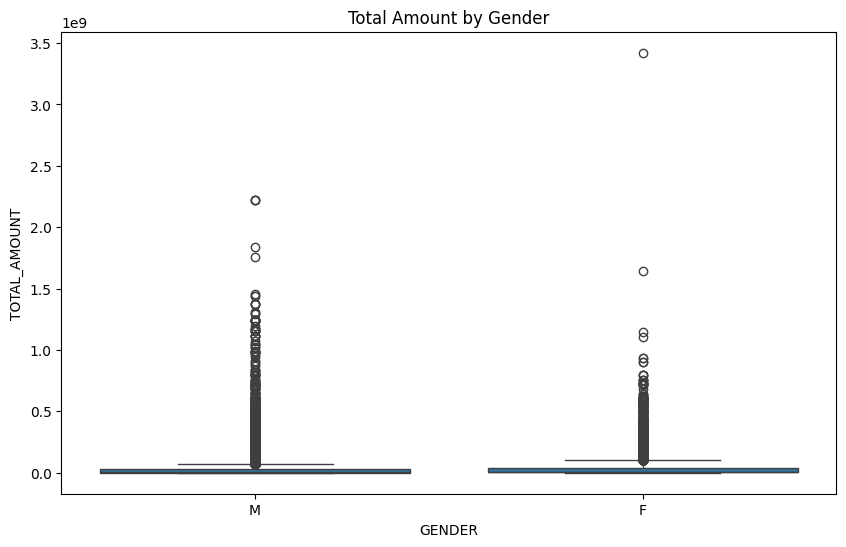

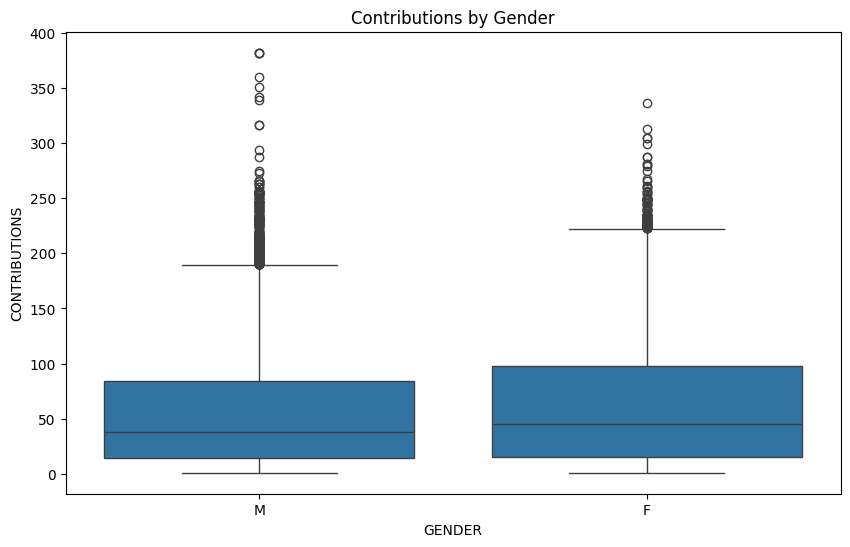

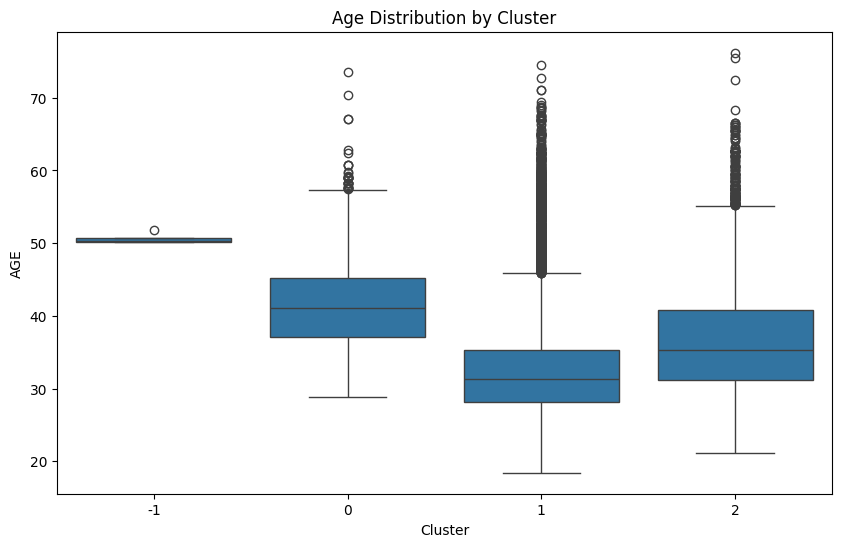


Cluster Distribution by Network:


Network,AIRTEL,MTN
Cluster,,
-1,0.353605,0.646395
0,0.263805,0.736195
1,0.346995,0.653005
2,0.295718,0.704282



Cluster Distribution by Channel:


Channel,Portal,WEB,WEBAPP
Cluster,,,
-1,0.330067,0.669933,0.000000
0,0.255160,0.743887,0.000953
1,0.132272,0.867728,0.000000
2,0.141024,0.858976,0.000000



Status Distribution by Cluster:


Status,FAILED,PENDING,POSTED,SUCCESS
Cluster,,,,
-1,0.456377,0.015863,0.005641,0.522119
0,0.385678,0.016513,0.003970,0.593839
1,0.517666,0.013222,0.008102,0.461010
2,0.492696,0.012560,0.009693,0.485051



Reason Distribution by Cluster:


Reason,'<' is an invalid start of a value. Path: $ | LineNumber: 0 | BytePositionInLine: 0.,100:'<' is an invalid start of a value. Path: $ | LineNumber: 0 | BytePositionInLine: 0.,100:00:00,"100:100103247 - The SSL connection could not be established, see inner exception.","100:100127814 - The SSL connection could not be established, see inner exception.","100:100132537 - The 'br' start tag on line 1 position 181 does not match the end tag of 'body'. Line 1, position 236.","100:100132539 - The 'br' start tag on line 1 position 181 does not match the end tag of 'body'. Line 1, position 236.","100:100132565 - The 'br' start tag on line 1 position 181 does not match the end tag of 'body'. Line 1, position 236.","100:100132574 - The 'br' start tag on line 1 position 181 does not match the end tag of 'body'. Line 1, position 236.","100:100132592 - The 'br' start tag on line 1 position 181 does not match the end tag of 'body'. Line 1, position 236.",...,1:Pending,200:Member has been Enrolled for the service,Object reference not set to an instance of an object.,Please supply Network code,Service failure,Successful,System could not process request please contact NSSF support,The channel is currently disabled,"The input does not contain any JSON tokens. Expected the input to start with a valid JSON token, when isFinalBlock is true. Path: $ | LineNumber: 0 | BytePositionInLine: 0.",manually failed
Cluster,,,,,,,,,,,,,,,,,,,,,
-1,0.000044,0.000000,0.079458,0.000000,0.000044,0.000000,0.000000,0.000044,0.000000,0.000044,...,0.005747,0.535963,0.001132,0.007663,0.000000,0.000000,0.000435,0.006792,0.000044,0.000000
0,0.000000,0.000326,0.074617,0.000163,0.000000,0.000163,0.000163,0.000000,0.000000,0.000000,...,0.003910,0.609156,0.000489,0.003910,0.000652,0.000326,0.000000,0.006191,0.000000,0.000326
1,0.000000,0.000000,0.073060,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.008292,0.475067,0.000290,0.003073,0.000000,0.000058,0.000348,0.006088,0.000000,0.000000
2,0.000000,0.000000,0.070967,0.000000,0.000000,0.000000,0.000000,0.000000,0.000141,0.000000,...,0.009978,0.499157,0.000984,0.006183,0.000000,0.000000,0.001265,0.012226,0.000000,0.000000


In [34]:
# 1. Analyze user engagement within clusters
print("User Engagement within Clusters (Mean and Median):")
display(smart.groupby('Cluster')[['CONTRIBUTIONS', 'TOTAL_AMOUNT']].agg(['mean', 'median']))

# 2. Investigate relationships between demographic factors and engagement/cluster
print("\nEngagement Metrics by Gender (Mean and Median):")
display(smart.groupby('GENDER')[['CONTRIBUTIONS', 'TOTAL_AMOUNT', 'AVERAGE_ANNUAL_GROWTH', 'PERCENTAGE_CONSISTENCY']].agg(['mean', 'median']))

plt.figure(figsize=(10, 6))
sns.boxplot(x='GENDER', y='TOTAL_AMOUNT', data=smart)
plt.title('Total Amount by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='GENDER', y='CONTRIBUTIONS', data=smart)
plt.title('Contributions by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='AGE', data=smart)
plt.title('Age Distribution by Cluster')
plt.show()

# 3. Explore patterns in 'Network' or 'Channel' usage related to engagement/cluster
print("\nCluster Distribution by Network:")
display(pd.crosstab(smart['Cluster'], smart['Network'], normalize='index'))

print("\nCluster Distribution by Channel:")
display(pd.crosstab(smart['Cluster'], smart['Channel'], normalize='index'))

# 4. Analyze 'Status' and 'Reason' patterns
print("\nStatus Distribution by Cluster:")
display(pd.crosstab(smart['Cluster'], smart['Status'], normalize='index'))

print("\nReason Distribution by Cluster:")
display(pd.crosstab(smart['Cluster'], smart['Reason'], normalize='index'))


## Summary:

### Data Analysis Key Findings

*   Reloading the dataset with the 'Occupation' column specified as string addressed a `DtypeWarning`.
*   Missing value visualizations (matrix and heatmap) provided insights into the extent and patterns of missing data.
*   Bar plots revealed the distribution of categorical variables such as 'Status', 'Network', 'Reason', 'PaymentFlag', 'Channel', 'Frequency', 'ContributionFrequency', and 'GENDER', showing varying levels of skewness.
*   Time series analysis of 'TOTAL_AMOUNT' based on 'FIRST_CONTRIBUTION' and 'LAST_CONTRIBUTION' dates indicated an overall upward trend in total contributions over time.
*   The correlation matrix of numerical features showed a moderate positive correlation between 'CONTRIBUTIONS' and 'TOTAL_AMOUNT' (around \$0.53). 'AGE' had a moderate positive correlation with 'CONTRIBUTIONS' (around \$0.45) and 'CONTRIBUTION\_YEARS' (around \$0.62). 'PERCENTAGE\_CONSISTENCY' had a weak positive correlation with 'CONTRIBUTIONS' (around \$0.16) and 'TOTAL\_AMOUNT' (around \$0.10) but a moderate negative correlation with 'CONTRIBUTION\_YEARS' (around -\$0.28).
*   Cluster analysis identified distinct user segments:
    *   Cluster 0: High-value, consistent users with significantly high total amount and contributions.
    *   Cluster 1: Consistent, lower-engagement users with lower total amount and contributions but very high consistency.
    *   Cluster 2: High-growth but inconsistent users with lower total amount and contributions but exceptionally high annual growth and low consistency.
*   Box plots indicated potential outliers in features like 'TOTAL_AMOUNT', 'CONTRIBUTIONS', 'AVERAGE\_ANNUAL\_GROWTH', and 'LATEST\_CONTRIBUTION'.
*   Analysis of engagement metrics by gender showed differences in mean and median contributions and total amount between genders.
*   Cross-tabulations revealed varying distributions of clusters across 'Network', 'Channel', 'Status', and 'Reason', suggesting potential relationships between these categories and user segments.

### Insights or Next Steps

*   Further investigate the characteristics of the outlier data points identified in the numerical features to understand if they represent valuable segments or data errors.
*   Explore the relationships between categorical variables and cluster membership more deeply to tailor engagement strategies for different user segments.
